In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.linear_model import LinearRegression

df = pd.read_csv('Dataframe.csv', sep=' ')
df = df.drop(df[df.iris_species != 'virginica'].index)
mini1 = min(df['sepal_width'])  # Нашли минимальные и максимальные значения каждого столбца, чтобы правильно определить
maxi1 = max(df['sepal_width'])  # периоды
mini2 = min(df['petal_length'])
maxi2 = max(df['petal_length'])

# 3.1
print('Пункт 3.1')
leni = 6  # Из формулы 1 + 3,32 * lg(50)

# Заранее составим подходящие нам интервалы Y - (2.1;2.4] u (2.4;2.7] u (2.7;3] u (3;3.3] u (3.3;3.6] u (3.6;3.9)
# X - [4.5;4.9] u (4.9;5.3] u (5.3;5.7] u (5.7;6.1] u (6.1;6.5] u (6.5;6.9]. А теперь составим таблицу

x = pd.Series(df['sepal_width'])
y = pd.Series(df['petal_length'])

l = []
for i in range(6):
    l.append([0, 0, 0, 0, 0, 0])

for n1, n2 in zip([2.1, 2.41, 2.71, 3.01, 3.31, 3.61], [2.4, 2.7, 3, 3.3, 3.6, 3.9]):
    s = x.between(n1, n2)
    for m1, m2 in zip([4.5, 4.91, 5.31, 5.71, 6.11, 6.51], [4.9, 5.3, 5.7, 6.1, 6.5, 6.9]):
        k = y.between(m1, m2)
        df2 = pd.concat([s, k], axis=1)
        for i in range(100, 150):
            if df2['sepal_width'][i] == True and df2['petal_length'][i] == True:
                ind1 = int((n1 - 2.1) / 0.3)
                ind2 = int((m1 - 4.5) / 0.4)
                l[ind1][ind2] += 1
df4 = pd.DataFrame(l, index=["(2.1;2.4]", "(2.4;2.7]", "(2.7;3]", "(3;3.3]", "(3.3;3.6]", "(3.6;3.9)"],
                   columns=['[4.5;4.9]', '(4.9;5.3]', '(5.3;5.7]', '(5.7;6.1]', '(6.1;6.5]', '(6.5;6.9]']).T
df4['i'] = df4.sum(axis=1)
df4.loc['j'] = df4.sum()
print(df4)
# Теперь приступим к вычислениям
n = 0
for i, j in zip(["(2.1;2.4]", "(2.4;2.7]", "(2.7;3]", "(3;3.3]", "(3.3;3.6]", "(3.6;3.9)"], range(6)):
    n += df4[i][j]**2 / (df4[i][6] * df4["i"][j])
n -= 1
n *= len(df['sepal_width'])
xi = 37.6   # Из таблицы распределения хи квадрата

if n > xi:
    print('Гипотеза о независимости ширины чашелистника и длины лепестка отвергается тк', n, '>', xi)
else:
    print('Гипотеза о независимости ширины чашелистника и длины лепестка подверждается тк', n, '<', xi)


Пункт 3.1
           (2.1;2.4]  (2.4;2.7]  (2.7;3]  (3;3.3]  (3.3;3.6]  (3.6;3.9)   i
[4.5;4.9]          0          2        4        0          0          0   6
(4.9;5.3]          1          5        5        3          0          0  14
(5.3;5.7]          0          1        5        6          2          0  14
(5.7;6.1]          0          1        5        3          1          0  10
(6.1;6.5]          0          0        1        0          0          1   2
(6.5;6.9]          0          1        2        0          0          1   4
j                  1         10       22       12          3          2  50
Гипотеза о независимости ширины чашелистника и длины лепестка подверждается тк -27.01298701298701 < 37.6


In [3]:
# 3.2
print('Пункт 3.2')

mean_x = sum(df['sepal_width'])/len(df['sepal_width'])  # Находим выборочные среднее выборок X и Y
mean_y = sum(df['petal_length'])/len(df['petal_length'])

sub_x = [i - mean_x for i in df['sepal_width']]     # По формуле отнимаем от элементов выборок Х и У, их среднее и
sub_y = [i - mean_y for i in df['petal_length']]    # складываем в наши списки

cov = (sum([sub_x[i] * sub_y[i] for i in range(len(sub_x))])) / (len(df['petal_length']) - 1)
print("Оценка ковариации коэфецента корелляции равна", cov)

# Для начала найдём выборочный коэфецент корелляции

mean_xy = sum((df['sepal_width'] * df['petal_length'])/len(df['sepal_width']))
s_xy = mean_xy - mean_y*mean_x
mean_x2 = sum(i**2 for i in df['sepal_width'])/len(df['sepal_width'])
mean_y2 = sum(i**2 for i in df['petal_length'])/len(df['petal_length'])
s_x = (mean_x2 - mean_x**2)**0.5
s_y = (mean_y2 - mean_y**2)**0.5
r_xy = s_xy/(s_x*s_y)
t = (r_xy * (len(df['petal_length']) - 2)**0.5) / (1 - r_xy ** 2) ** 0.5
# А теперь сравним наше распределение статистики со значением из таблицы Стьюдента при alpha = 0.01
st = 2.57
print("Сам коэфецент корелляции равен", r_xy)
if st > t:
    print("Значит гипотеза о незначемости коэфецента коркеелляции подтверждается тк", st, ">", t)
else:
    print("Значит гипотеза отвергается на данном уровне значимости 0.99, тк", st, "<", t)

Пункт 3.2
Оценка ковариации коэфецента корелляции равна 0.07137959183673467
Сам коэфецент корелляции равен 0.4010445773427923
Значит гипотеза отвергается на данном уровне значимости 0.99, тк 2.57 < 3.0331231223315385


Пункт 3.3


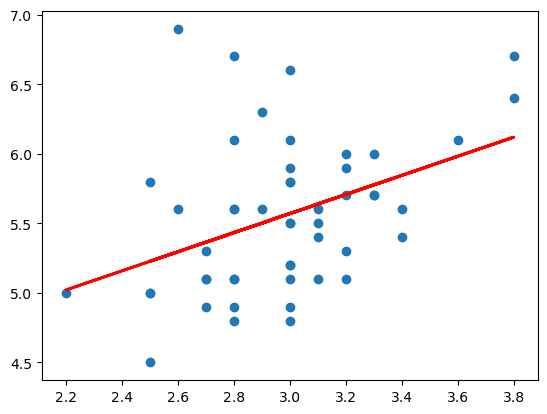

Уравнение линейной регрессии: Y = 3.5109 + 0.68632X 
Все нужные параметры можно легко увидеть
Как нам известно, коэфецент детерминации равен квадрату коэфецента корелляции, а точнее 0.16083675301605893
Гипотза о значимости критерия Фишера будет отвергнута тк 9.199835875222224 > 4.08


In [7]:
# 3.3
print("Пункт 3.3")

x = df['sepal_width'].values.reshape(-1, 1)
y = df['petal_length'].values.reshape(-1, 1)
reg = LinearRegression()
reg.fit(x, y)
plt.scatter(df['sepal_width'], df['petal_length'])
plt.plot(df['sepal_width'], reg.predict(x), color='red', linewidth=2)
plt.show()
print("Уравнение линейной регрессии: Y = {:.5} + {:.5}X".format(reg.intercept_[0], reg.coef_[0][0]),
      "\nВсе нужные параметры можно легко увидеть")

de = r_xy**2
print("Как нам известно, коэфецент детерминации равен квадрату коэфецента корелляции, а точнее", de)

m = 1
f = (de/(1-de)) * (len(df['petal_length']) - m - 1)/m
fi = 4.08   # При уровне значимости 0.05
if f > fi:
    print("Гипотза о значимости критерия Фишера будет отвергнута тк", f, ">", fi)
else:
    print("Гипотза о значимости критерия Фишера будет значимой тк", f, "<", fi)